<a href="https://colab.research.google.com/github/seremmartin64-ops/CIFAR-10-DATASET/blob/main/Tomato_leaf_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
files.upload()  # Choose kaggle.json from your computer


Saving kaggle (2)tomato.json to kaggle (2)tomato.json


{'kaggle (2)tomato.json': b'{"username":"seremmartin","key":"0e2632f2322c1f8d433284ad1d2c1da5"}'}

In [9]:
!mkdir -p ~/.kaggle
!cp "kaggle (2)tomato.json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle datasets download -d kaustubhb999/tomatoleaf
!unzip tomatoleaf.zip

Streaming output truncated to the last 5000 lines.
  inflating: tomato/train/Tomato___Target_Spot/002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0044d10f-7062-4655-8abd-9fffc5b2f152___Com.G_TgS_FL 7908.JPG  
  inflating: tomato/train/Tomato___Target_Spot/00854623-ba28-446d-a1d5-03c0ae3f99d9___Com.G_TgS_FL 7949.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0118c27a-f34a-41e1-8b2f-d2c564f83c5c___Com.G_TgS_FL 0013.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0118ed61-b135-45be-ad81-7e2d54203be4___Com.G_TgS_FL 8241.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0197df47-a9cb-4b6c-b72c-ac0e9af6d135___Com.G_TgS_FL 0779.JPG  
  inflating: tomato/train/Tomato___Target_Spot/025510ac-15db-4861-b02b-21da82161100___Com.G_TgS_FL 0952.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0288164e-d6cf-4215-b593-7b581308a4cf___Com.G_TgS_FL 9777.JPG  
  inflating: tomato/train/Tomato___Target_Spot/03002b91-afe3-4c72-86b

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

import numpy as np
import os


In [12]:
# dataset
data_dir = "/content/tomato"

In [13]:
# Image generator

data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)


In [14]:
# Training set

train_set = data_gen.flow_from_directory(
    "/content/tomato",
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 8800 images belonging to 2 classes.


In [15]:
# Image generator

data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)



In [48]:
# Validation set

val_set = data_gen.flow_from_directory(
    "/content/tomato",
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2200 images belonging to 2 classes.


In [49]:
# Get class names from the train_set directory structure
disease_names = sorted(os.listdir(os.path.join(data_dir, 'train')))
numpy_disease_names = np.array(disease_names)


In [50]:
# building the CNN model

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=len(numpy_disease_names), activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


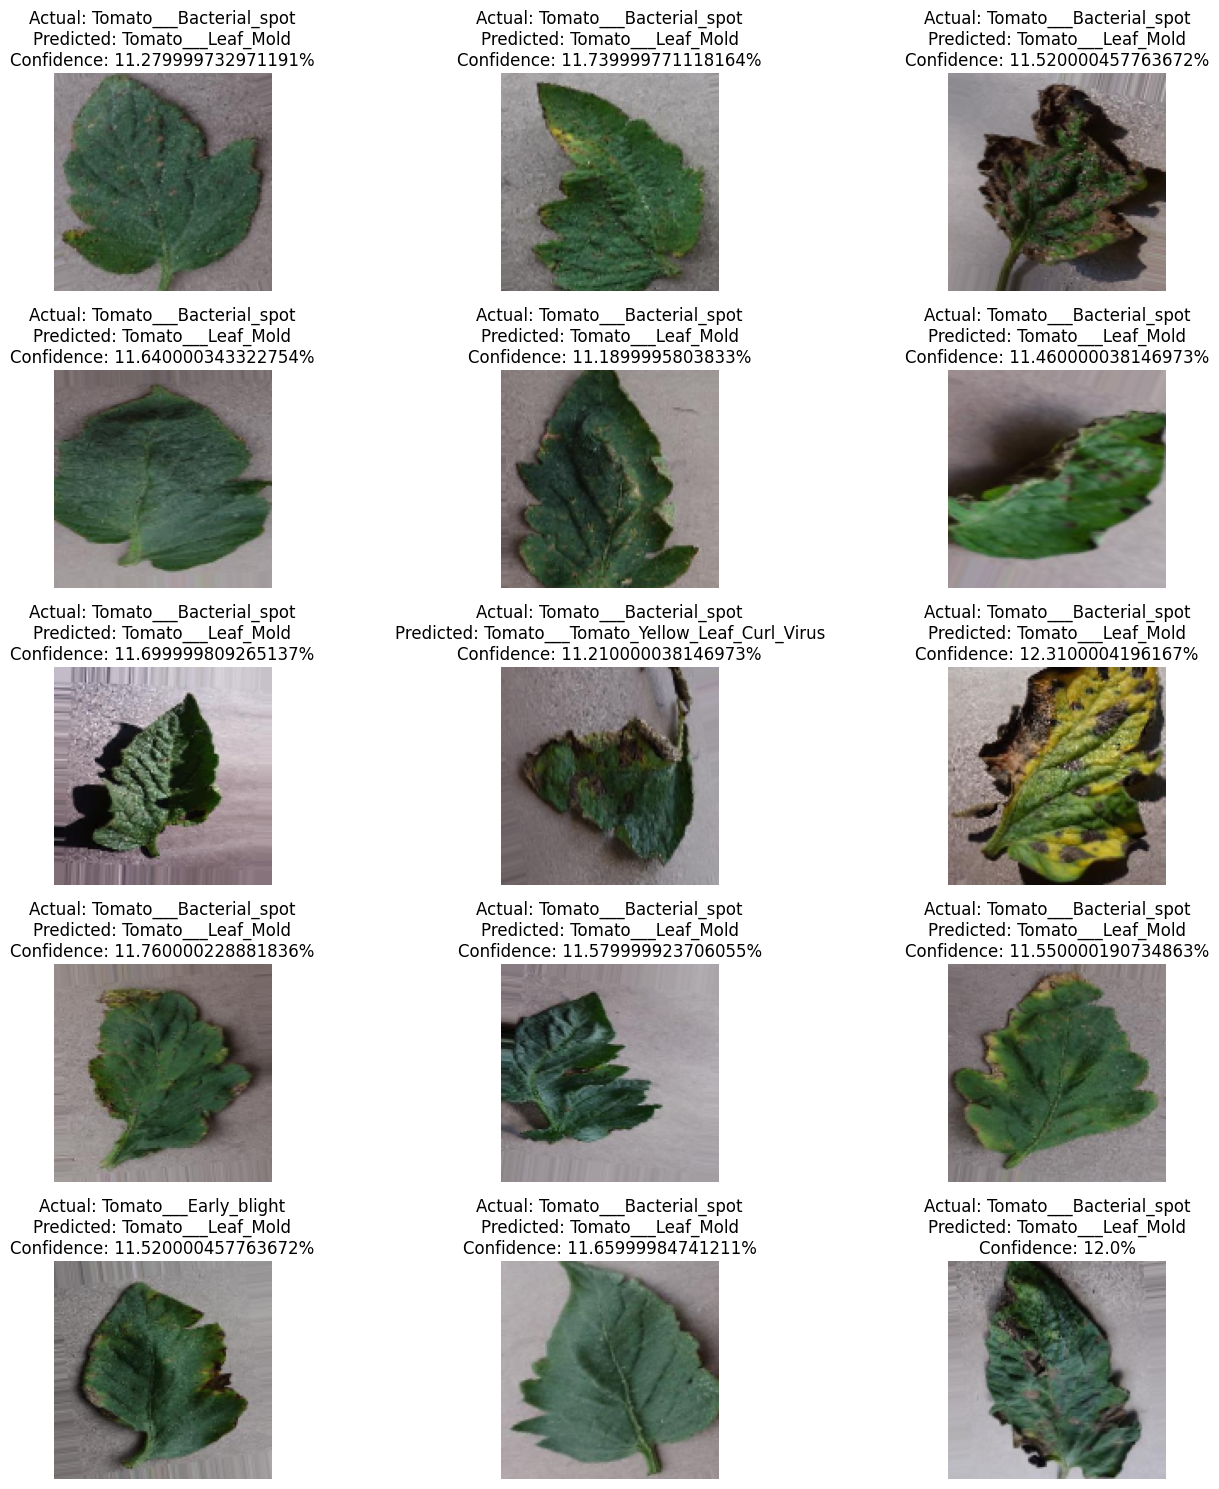

In [51]:
# make prediction
x_batch, y_batch = next(val_set)

plt.figure(figsize=(15, 15))
for i in range(15):
    ax = plt.subplot(5, 3, i + 1)
    img = x_batch[i]

    # Get actual label
    actual_idx = int(np.argmax(y_batch[i]))
    actual_label = disease_names[actual_idx]

    # Get prediction
    img_array = tf.expand_dims(img, 0)
    predictions = model.predict(img_array, verbose=0)[0]
    predicted_label = disease_names[np.argmax(predictions)]
    confidence = round(100 * np.max(predictions), 2)

    plt.imshow(img)
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}\nConfidence: {confidence}%")
    plt.axis("off")

plt.tight_layout()
plt.show()